In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

(0.0, 720.0)

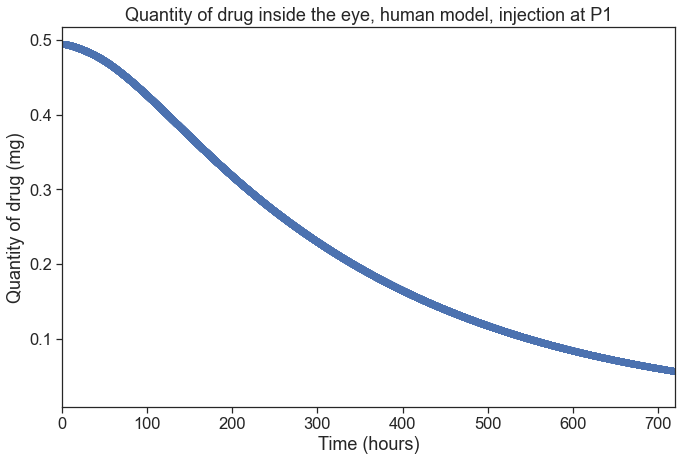

In [21]:
sns.set_theme(style="ticks", font_scale=1.5)
sns.set_color_codes(palette='colorblind')

data_human = pd.read_csv('../MFPT_paper_validation_2023-11/drug_qty_over_time_P2.csv')

ax = sns.regplot(data=data_human, x='Time', y='IgG', fit_reg=False)
ax.figure.set_size_inches(11, 7)
ax.set(xlabel="Time (hours)", ylabel="Quantity of drug (mg)", title='Quantity of drug inside the eye, human model, injection at P1')
ax.set_xlim([0,720])

## Linear plots

0.5578316527468528 0.12088431271986949


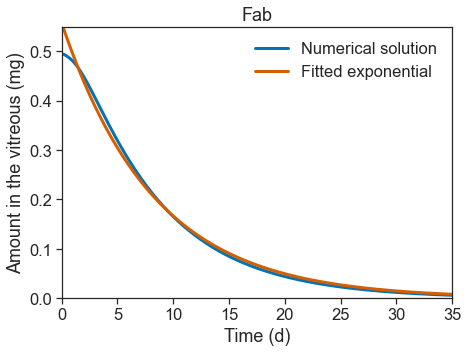

In [45]:
from scipy.optimize import curve_fit

t = (data_human['Time'].to_numpy())/24
density_fab = data_human['Fab'].to_numpy()
density_igg = data_human['IgG'].to_numpy()

# Define function used for fitting
def func(x,a,b):
    return a*np.exp(-b*x)

[a, b], conf_int = curve_fit(func, t, density_fab)
half_life = np.log(2)/b
print(a,b)

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})
ax = plt.plot(t,density_fab, label = 'Numerical solution', linewidth=3, color='b')
ax = plt.plot(t, func(t, *[a, b]), label='Fitted exponential', linewidth=3, color='r')
plt.xlim((0,35))
plt.ylim((0, 0.55))
plt.xlabel('Time (d)')
plt.ylabel('Amount in the vitreous (mg)')
plt.legend(frameon=False)
plt.title('Fab')
plt.show()

0.5548794757504925 0.07215764818917687


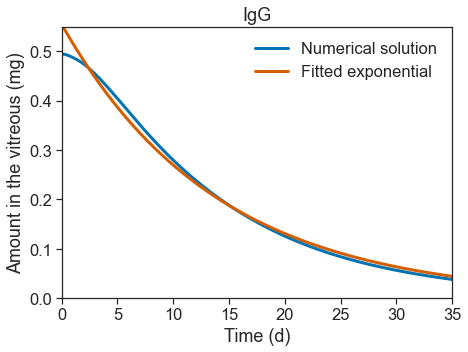

In [46]:
[a, b], conf_int = curve_fit(func, t, density_igg)
half_life = np.log(2)/b
print(a,b)

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})
ax = plt.plot(t,density_igg, label = 'Numerical solution', linewidth=3, color='b')
ax = plt.plot(t, func(t, *[a, b]), label='Fitted exponential', linewidth=3, color='r')
plt.xlim((0,35))
plt.ylim((0, 0.55))
plt.xlabel('Time (d)')
plt.ylabel('Amount in the vitreous (mg)')
plt.legend(frameon=False)
plt.title('IgG')
plt.show()

## Log-linear plots

0.5578316527468528 0.12088431271986949


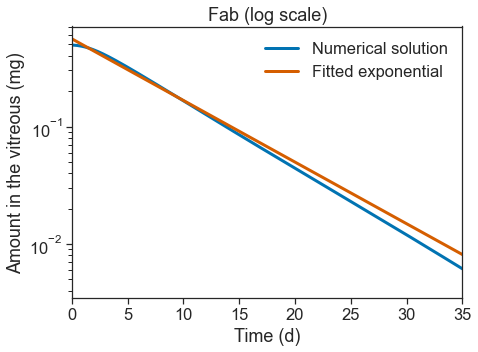

In [68]:
[a, b], conf_int = curve_fit(func, t, density_fab)
half_life = np.log(2)/b
print(a,b)

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})
ax = plt.plot(t,density_fab, label = 'Numerical solution', linewidth=3, color='b')
ax = plt.plot(t, func(t, *[a, b]), label='Fitted exponential', linewidth=3, color='r')
plt.xlim((0,35))
plt.xlabel('Time (d)')
plt.ylabel('Amount in the vitreous (mg)')
plt.legend(frameon=False)
plt.title('Fab (log scale)')
plt.yscale('log')
plt.show()

0.5548794757504925 0.07215764818917687


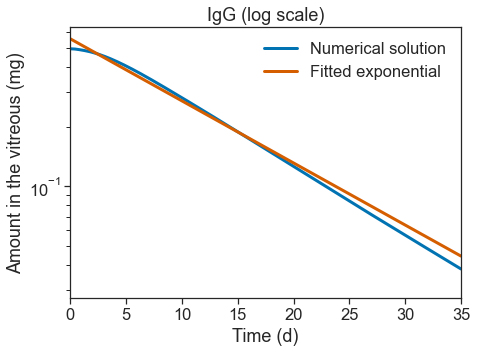

In [67]:
[a, b], conf_int = curve_fit(func, t, density_igg)
half_life = np.log(2)/b
print(a,b)

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 13})
ax = plt.plot(t, density_igg, label = 'Numerical solution', linewidth=3, color='b')
ax = plt.plot(t, func(t, *[a, b]), label='Fitted exponential', linewidth=3, color='r')
plt.xlim((0,35))
#plt.ylim((0, 0.55))
plt.xlabel('Time (d)')
plt.ylabel('Amount in the vitreous (mg)')
plt.legend(frameon=False)
plt.title('IgG (log scale)')
plt.yscale('log')
plt.show()